In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [158]:
crime = pd.read_csv('crime.csv', header=0)

In [159]:
#review data structure
crime.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3', 'Unnamed: 13'],
      dtype='object')

In [160]:
crime_mod = crime.copy()

In [161]:
#drop notes rows from end
crime_mod.drop(crime_mod.index[-3:], inplace=True)

In [162]:
crime_mod.tail(2)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13
346,Yonkers,"199,134","1,036",6.0,NaN,25,390,615,"2,368",470,"1,662",236,10.0,NaN
347,Yorktown Town,"36,643",15,0.0,NaN,0,2,13,334,45,287,2,NaN,NaN


In [163]:
#clean numbers
property_crime = crime_mod['Property\ncrime'].apply(lambda x: int(''.join(list(filter(str.isdigit, str(x))))))
pop = crime_mod['Population'].apply(lambda x: int(''.join(list(filter(str.isdigit, str(x))))))
murder = crime_mod['Murder and\nnonnegligent\nmanslaughter'].apply(lambda x: int(''.join(list(filter(str.isdigit, str(x))))))
robbery = crime_mod['Robbery'].apply(lambda x: int(''.join(list(filter(str.isdigit, str(x))))))

In [164]:
#prep columns for analysis
pop2 = pop**2
murder_flag = murder-murder
robbery_flag = robbery-robbery
for i in murder_flag.index:
    if murder.at[i] > 0:
        murder_flag.at[i] = 1
for i in robbery_flag.index:
    if robbery.at[i] > 0:
        robbery_flag.at[i] = 1

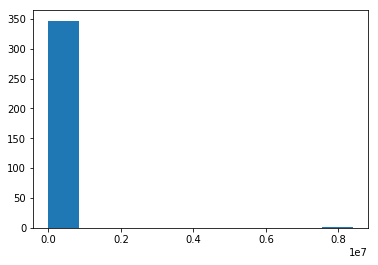

In [122]:
#review population data
plt.hist(pop) 
plt.show()

In [165]:
#identify the outlier
crime_mod['Pop (#)'] = pop
max_pop = crime_mod['Pop (#)'].idxmax()
crime_mod.loc[max_pop]

City                                       New York
Population                                8,396,126
Violent\ncrime                               52,384
Murder and\nnonnegligent\nmanslaughter          335
Rape\n(revised\ndefinition)1                    NaN
Rape\n(legacy\ndefinition)2                   1,112
Robbery                                      19,170
Aggravated\nassault                          31,767
Property\ncrime                             141,971
Burglary                                     16,606
Larceny-\ntheft                             117,931
Motor\nvehicle\ntheft                         7,434
Arson3                                          NaN
Unnamed: 13                                     NaN
Pop (#)                                     8396126
Name: 216, dtype: object

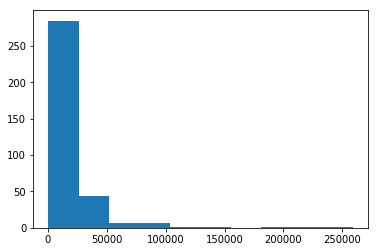

In [167]:
#drop the outlier
crime_mod.drop(crime_mod.index[max_pop], inplace=True)
pop = crime_mod['Population'].apply(lambda x: int(''.join(list(filter(str.isdigit, str(x))))))
plt.hist(pop) 
plt.show()

In [ ]:
#maybe the model will run better without NYC